# Lab Segmentation 2

In [2]:
from commonfunctions import *
from skimage.color import rgba2rgb
%matplotlib inline
%load_ext autoreload
%autoreload 2


170.0


/tmp/ipykernel_5894/3612194526.py:26: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = 255 * rgb2gray((io.imread(f"./{file}.png")).astype('uint8'))


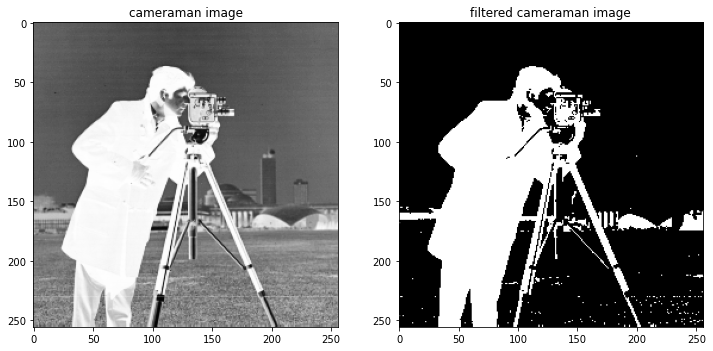

117.0


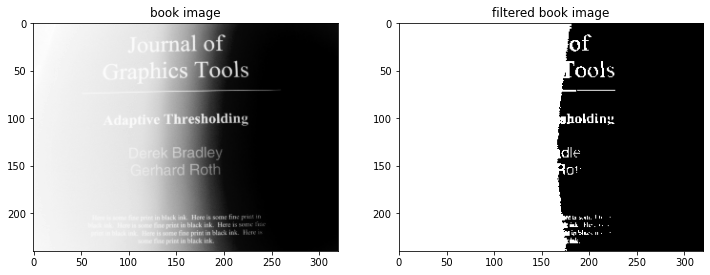

139.0


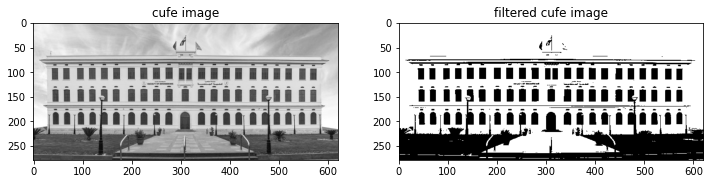

164.0


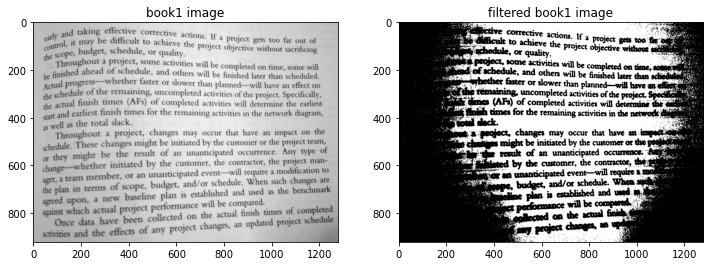

In [36]:


def calcThreshold(hist, accHist, iFrom, iTo):
    iFrom, iTo = int(iFrom), int(iTo)
    numOfPixels = accHist[iTo] - (accHist[iFrom - 1] if iFrom > 0 else 0)
    mean = np.sum(
        hist[iFrom:iTo+1] * np.arange(iFrom, iTo+1)
    ) / numOfPixels
    return np.round(mean)


def avgThreshold(hist, accHist, Tinit):
    mean1 = calcThreshold(hist, accHist, 0, Tinit)
    mean2 = calcThreshold(hist, accHist, Tinit, hist.shape[0] - 1)
    newThreshold = (mean1 + mean2) // 2
    return newThreshold if Tinit == newThreshold else avgThreshold(hist, accHist, newThreshold)


def getGlobalThreshold(img):
    img = np.copy(img)
    hist = np.histogram(img.flatten(), bins=256)[0]
    accHist = np.cumsum(hist)
    Tinit = calcThreshold(hist, accHist, 0, hist.shape[0] - 1)
    return avgThreshold(hist, accHist, Tinit)


for file in ['cameraman', 'book', 'cufe', 'book1']:
    img = 255 * rgb2gray((io.imread(f"./{file}.png")).astype('uint8'))
    threshold = getGlobalThreshold(img)
    print(threshold)
    imgAfterThreshold = img >= threshold
    show_images([img, imgAfterThreshold], [
                f'{file} image', f'filtered {file} image'])


/tmp/ipykernel_5894/3378665847.py:28: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = 255 * rgb2gray((io.imread(f"./book.png")).astype('uint8'))


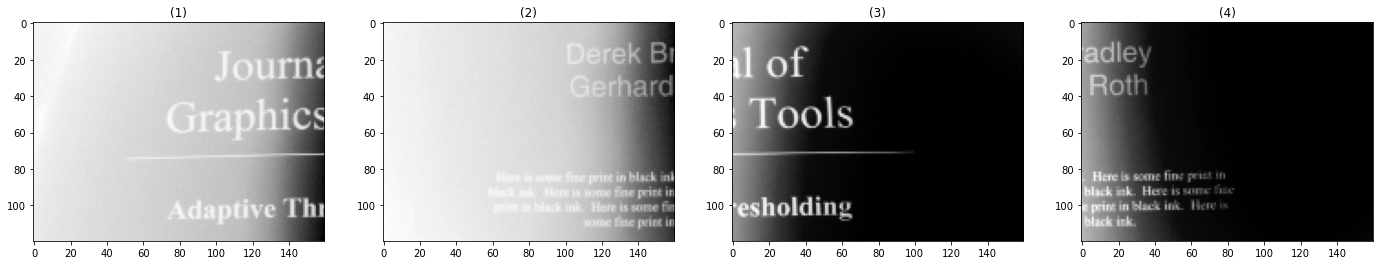

155.0 157.0 73.0 70.0
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


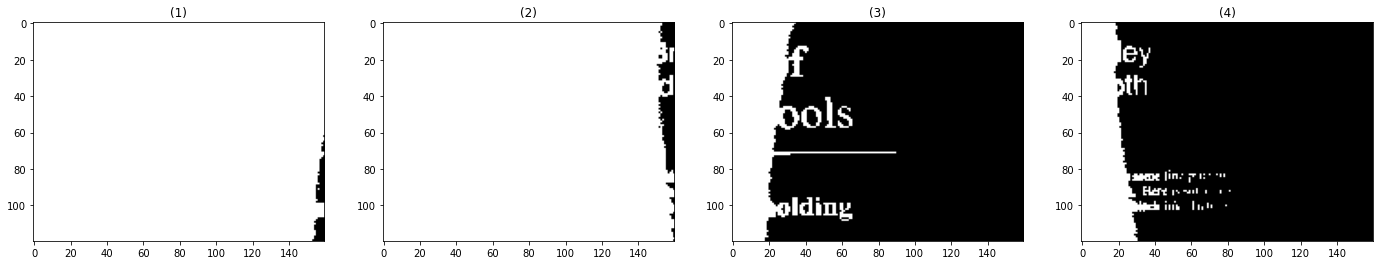

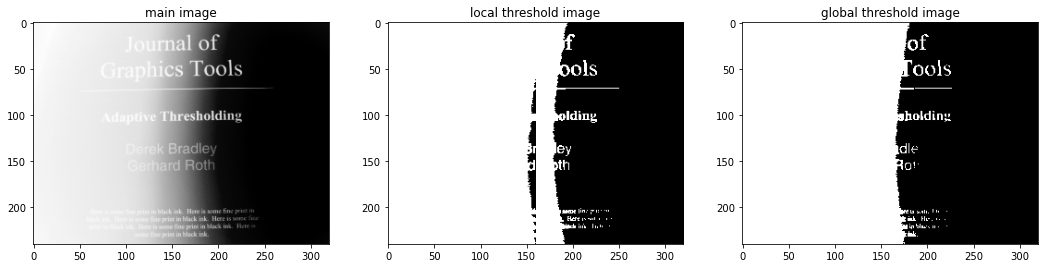

In [65]:
def localThreshold(image):
    img = np.copy(image)
    height, width = img.shape
    img1 = img[:height//2, :width//2]
    img2 = img[height//2:, :width//2]
    img3 = img[:height//2, width//2:]
    img4 = img[height//2:, width//2:]
    th1 = getGlobalThreshold(img1)
    th2 = getGlobalThreshold(img2)
    th3 = getGlobalThreshold(img3)
    th4 = getGlobalThreshold(img4)
    show_images([img1, img2, img3, img4])
    print(th1, th2, th3, th4)
    img1 = img1 >= th1
    img2 = img2 >= th2
    img3 = img3 >= th3
    img4 = img4 >= th4
    print(img1)
    show_images([img1 , img2 , img3 , img4])
    img[:height//2, :width//2] = img1
    img[height//2:, :width//2] = img2
    img[:height//2, width//2:] = img3
    img[height//2:, width//2:] = img4

    return img


img = 255 * rgb2gray((io.imread(f"./book.png")).astype('uint8'))
cpy = np.copy(img)
globalThreshold = getGlobalThreshold(img)
globalThresholdImg = img >= globalThreshold
localThresholdImg = localThreshold(img)
show_images([cpy, localThresholdImg, globalThresholdImg], [
            'main image', 'local threshold image', 'global threshold image'])


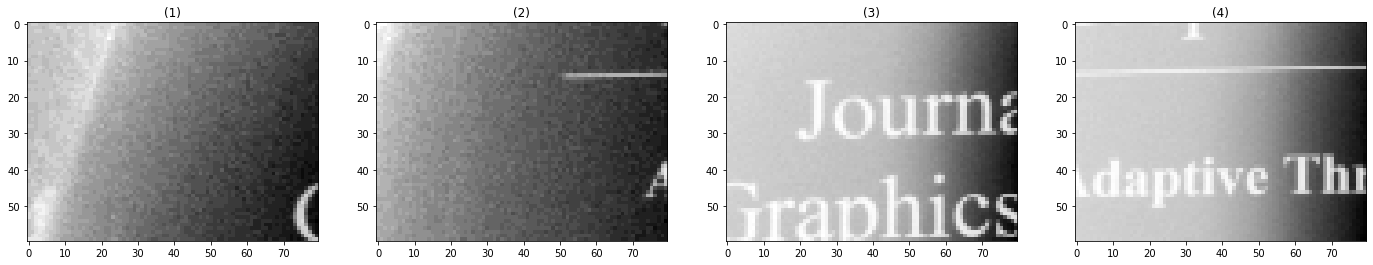

124.0 108.0 141.0 137.0
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


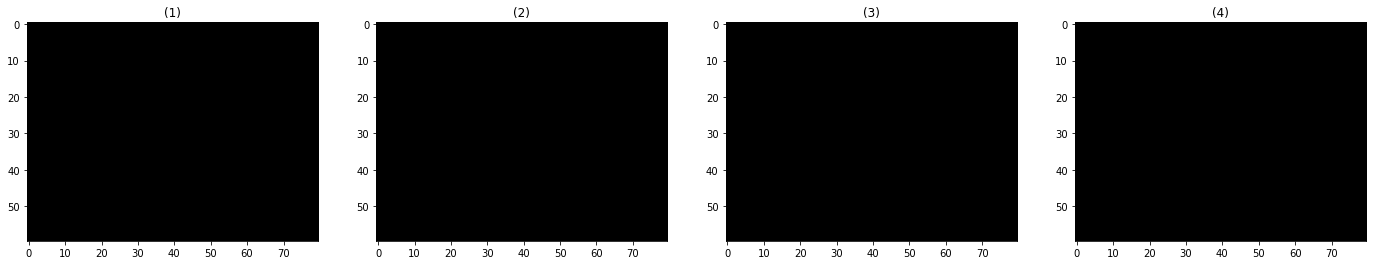

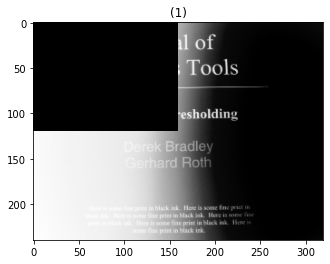

In [66]:
def fineThreshold(img):
    height, width = img.shape
    img1 = img[:height//2, :width//2]
    img2 = img[height//2:, :width//2]
    img3 = img[:height//2, width//2:]
    img4 = img[height//2:, width//2:]

    # show_images([localThreshold(img1)])
    img[:height//2, :width//2] = localThreshold(img1)
    # img[height//2:, :width//2] = localThreshold(img2)
    # img[:height//2, width//2:] = localThreshold(img3)
    # img[height//2:, width//2:] = localThreshold(img4)
    return img
img = fineThreshold(cpy)
show_images([img])
    